# Project Procedures

For this part of my project, I will be using tweets gathered through Twitter's API to analyze words, co-occurence terms and hashtags to determine whether Die Hard is in face a Christmas movie or not. 

In this notebook, I will be trying to gain insight on these tweets by exploring the following:
  - What are the most common words in the dataset?
  - What are the most common hashtags in the dataset?
  - What are the most commonly associated words/co-occurrences (or words that occur together) in the dataset?

## Importing Libraries and File

In [1]:
import re
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# initializing file
df = pd.read_csv('die-hard-tweets-no-retweets.csv')
df.columns = ['Tweet']

# preview of data
df.head()

,Tweet
0,Terrible take. Die Hard is a Christmas movie a...
1,@VivForde https://t.co/IF5rVCo6tp
2,Broke: Die Hard is a Christmas movie. Woke: E...
3,Okay I'm like 97% Die Hard is a Christmas movi...
4,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証 https://t.co/y...


In [3]:
# amount of tweets
df.shape

(2111, 1)

## Clean Tweets

From the above, we have 2,111 tweets but some may only be URL's and mentions with no real body to the tweets. We can also see that some tweets have user handles, punctuations, numbers, and symbols that will not be helpful for our analysis. I will create a function to clean these tweets and make all words lowercase.

In [4]:
# First, create function to remove Twitter Handles
def clean_tweet(tweet):
    tweet = re.sub('http\S+\s*', '', tweet) #removes all urls
    tweet = re.sub('RT|cc', '', tweet) #removes RT and CC's 
    tweet = re.sub('@\S+', '', tweet) #removes mentions
    tweet = re.sub('[%s]' % re.escape("""!"$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', tweet) #removes any special characters except hashtags
    tweet = re.sub('\s+',' ', tweet) #removes blank spaces
    return tweet.lower()

# Remove unwanted terms and symbols
df['clean_tweet'] = np.vectorize(clean_tweet)(df['Tweet'])
df.head()

,Tweet,clean_tweet
0,Terrible take. Die Hard is a Christmas movie a...,terrible take die hard is a christmas movie an...
1,@VivForde https://t.co/IF5rVCo6tp,
2,Broke: Die Hard is a Christmas movie. Woke: E...,broke die hard is a christmas movie woke eyes ...
3,Okay I'm like 97% Die Hard is a Christmas movi...,okay im like 97 die hard is a christmas movie ...
4,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証 https://t.co/y...,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証


As we can see from the above, some of the tweets are now empty, I will replace the empty data with NA's so that I can remove these rows.

In [5]:
df['clean_tweet'].replace(' ', np.nan, inplace=True)
df = df.dropna()
df.shape

(2096, 2)

Now that we've cleaned the tweets, let's also remove single letters such as "a" and "I" that will not be very useful for our analysis. 

In [6]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
df.head()

,Tweet,clean_tweet
0,Terrible take. Die Hard is a Christmas movie a...,terrible take die hard is christmas movie and ...
2,Broke: Die Hard is a Christmas movie. Woke: E...,broke die hard is christmas movie woke eyes wi...
3,Okay I'm like 97% Die Hard is a Christmas movi...,okay im like 97 die hard is christmas movie am...
4,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証 https://t.co/y...,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証
5,"Okay, Darren, I concede. Even though Bruce Wil...",okay darren concede even though bruce willis s...


WIth removing the NA's, we have 2,096 tweets remaining. Let's also re-index the DataFrame which will make it easier for our other analyses. 

In [7]:
# Reset indeces
df.index = range(2096)
df.head()

,Tweet,clean_tweet
0,Terrible take. Die Hard is a Christmas movie a...,terrible take die hard is christmas movie and ...
1,Broke: Die Hard is a Christmas movie. Woke: E...,broke die hard is christmas movie woke eyes wi...
2,Okay I'm like 97% Die Hard is a Christmas movi...,okay im like 97 die hard is christmas movie am...
3,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証 https://t.co/y...,「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証
4,"Okay, Darren, I concede. Even though Bruce Wil...",okay darren concede even though bruce willis s...


## Tokenize tweets

Next, we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens. 

In [8]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [terrible, take, die, hard, is, christmas, mov...
1    [broke, die, hard, is, christmas, movie, woke,...
2    [okay, im, like, 97, die, hard, is, christmas,...
3                    [「ダイ・ハード」がクリスマス映画かどうかを登場要素から徹底検証]
4    [okay, darren, concede, even, though, bruce, w...
Name: clean_tweet, dtype: object

## Most Common Terms

Using the tokenized tweets, we can now count the words that are the most common in our collection of tweets. Using the Counter function from the collections library, we can use the most_common() function to count the most common words in our tweets. Also, at this point, it would be common to remove stopwords using NLTK. However, based on the list of stopwords listed, for the purposes of what I am trying to find, a lot of the words that I would be using to determine whether people agree or disagree with Die Hard being a Christmas movie would be removed. 

In [9]:
import operator
from collections import Counter

count_all = Counter()
for line in tokenized_tweet:
    count_all.update(line)
print(count_all.most_common(15))

[('christmas', 2546), ('hard', 2032), ('die', 2018), ('is', 1537), ('movie', 1478), ('the', 1326), ('and', 698), ('to', 614), ('of', 478), ('it', 450), ('that', 356), ('not', 330), ('on', 325), ('in', 320), ('you', 298)]


As we can see, the most frequency words are the keywords we used to query my API request (**Christmas** and **Die Hard**), but what is more interesting is that the word '*is*' is mentioned 1537 times, '*not*' is mentioned 330 times. 

To get a better visualization of the most common words and whether we deem them positive or negative, we will us the WordCloud visualization tool to plot the most common words in our cleaned tweets. 

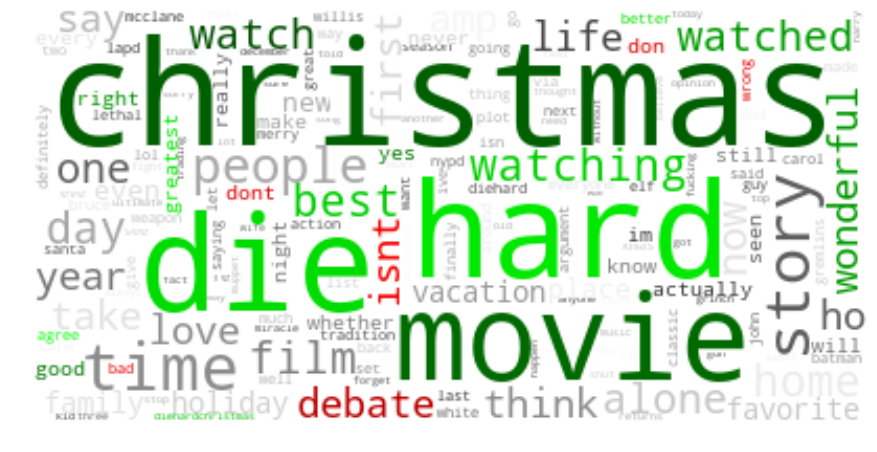

In [10]:
all_words = ' '.join([text for text in df['clean_tweet']])
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt


class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

# Since the text is small collocations are turned off and text is lower-cased
wc = WordCloud(background_color='white', collocations=False).generate(all_words)

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['christmas', 'is', 'movie', 'die', 'hard', 'yes', 'right',
                'christmas movie', 'good', 'christmas film', 'die hard', 'wonderful',
                'diehardchristmas', 'agree', 'greatest', 'best', 'obvious', 
                'better', 'watched', 'watching', 'watch'],
    # will be colored with a red single color function
    'red': ['debate', 'disagree', 'bad', 'dont', 'don', 'no', 'not', 'wrong', 'movie debate','isnt']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

When creating the WordCloud, I labeled the positive words in green and the negative words in red. Based on that, we can see that most of the words are pretty positive. To have a more quantitative count of whether most of the words are positive or negative, let's create a bar graph to plot the most common words for comparison.

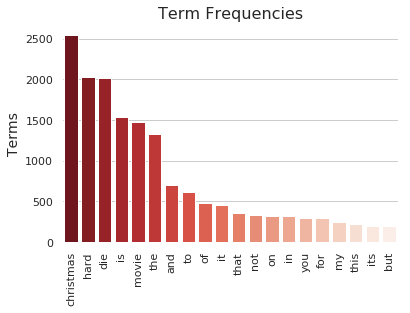

<Figure size 432x288 with 0 Axes>

In [11]:
# Label and graph the top 20 words used
word_freq = count_all.most_common(20)
terms, ys = zip(*word_freq)
xs = np.arange(len(terms))

# Create graph
sns.set(style = 'whitegrid')
sns.barplot(xs, ys, palette='Reds_r')
plt.xticks(xs, terms, rotation='vertical')
plt.title('Term Frequencies', fontsize = 16)
plt.ylabel('Terms', fontsize = 14)
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig('terms_max')

As we can see from above, "not" is one of the top 20 words used in all of the tweets. When compared to the amount of times "is" was used in the tweets, the difference between the times "is" was used and "not" was used is around 1200 times, meaning that most of the times is was used are for positive reasons as opposed to negative. 

## Most Common Hashtags 

Now that we have the most common terms, let's see what the most common hashtags are. 

In [12]:
# Count hastags only
terms_hash = [word for line in tokenized_tweet for word in line if word.startswith('#')]
count_hashtags = Counter()
count_hashtags.update(terms_hash)
print(count_hashtags.most_common(15))

[('#christmas', 41), ('#diehard', 37), ('#diehardchristmas', 26), ('#diehardisachristmasmovie', 19), ('#yippeekiyay', 7), ('#1', 6), ('#merrychristmas', 6), ('#christmasmovies', 5), ('#die', 5), ('#2', 4), ('#3', 4), ('#lapd', 4), ('#nypd', 4), ('#movies', 4), ('#boxing', 4)]


In all of our tweets, it seems as though hashtags were not used that much. However, what we can see is that all of the hashtags used are either positive or neutral.

Let's visualize this information in both WordCloud and bar graph.

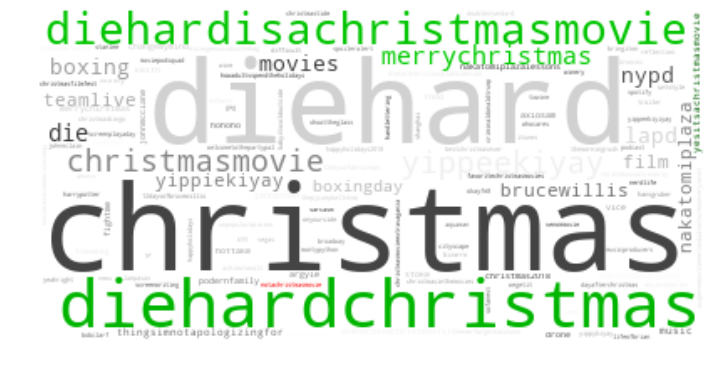

In [13]:
all_hashtags = ' '.join([text for text in terms_hash])

wc = WordCloud(background_color='white', collocations=False).generate(all_hashtags)

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['diehardisachristmasmovie',
                'diehardchristmas', 'yesitsachristmasmovie', 'merrychristmas'],
    # will be colored with a red single color function
    'red': ['notachristmasmovie', 'noitsnotachristmasmovie']
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

There seems to be one negative hashtag amongst the positive/neutral hashtags. 

Let's see what our bar graph shows us.

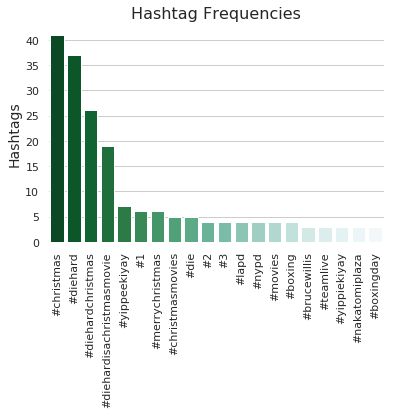

<Figure size 432x288 with 0 Axes>

In [14]:
hashtag_freq = count_hashtags.most_common(20)
hashtags, y_s = zip(*hashtag_freq)

x_s = np.arange(len(hashtags))
sns.set(style = 'whitegrid')
sns.barplot(x_s, y_s, palette='BuGn_r')
plt.xticks(x_s, hashtags, rotation='vertical')
plt.title('Hashtag Frequencies', fontsize = 16)
plt.ylabel('Hashtags', fontsize = 14)
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig('Hashtags_max')

## Most Common Term Co-occurences

As we can see above, we are not 100% sure how the terms are used, positively or negatively. To hopefully get some clarity on that, I will find the co-occurrences to find out the context of some of these terms. I will build a co-occurrence matrix such that com[x][y] contains the number of times the term x has been seen in the same tweet as term y.

In [15]:
# co-occurences matrix 
from collections import defaultdict
 
com = defaultdict(lambda : defaultdict(int))
 
for line in tokenized_tweet: 
    terms_only = [term for term in line 
                  if not term.startswith(('#', '@'))]

    # Build co-occurrence matrix
    for i in range(len(terms_only)-1):            
        for j in range(i+1, len(terms_only)):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1
                
com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))

# Get the most frequent co-occurrences
coterms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
print(coterms_max[:20])

[(('christmas', 'hard'), 2602), (('christmas', 'die'), 2577), (('die', 'hard'), 2224), (('christmas', 'is'), 2162), (('christmas', 'movie'), 2099), (('christmas', 'the'), 1917), (('is', 'movie'), 1618), (('hard', 'is'), 1596), (('die', 'is'), 1568), (('die', 'movie'), 1529), (('hard', 'movie'), 1527), (('hard', 'the'), 1343), (('die', 'the'), 1339), (('is', 'the'), 1190), (('movie', 'the'), 969), (('and', 'christmas'), 922), (('and', 'hard'), 696), (('and', 'die'), 690), (('and', 'the'), 658), (('hard', 'to'), 654)]


From our counter, we can see that the top three are the words that we queried being used together, which makes sense. However, what is interesting is that none of the negative words, such as "no" or "not", are in the most common co-terms. 

Let's see how they compare on a bar graph.

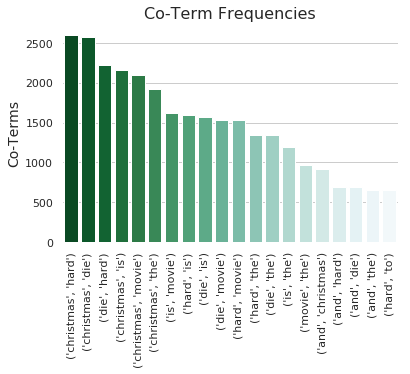

<Figure size 432x288 with 0 Axes>

In [16]:
coterms_freq = coterms_max[:20]
coterms, yss = zip(*coterms_freq)

xss = np.arange(len(coterms))
sns.set(style = 'whitegrid')
sns.barplot(xss, yss, palette='BuGn_r')
plt.xticks(xss, coterms, rotation='vertical')
plt.title('Co-Term Frequencies', fontsize = 16)
plt.ylabel('Co-Terms', fontsize = 14)
sns.despine(left=True, bottom=True)
plt.show()
plt.savefig('Coterms_max')

The graph confirms that none of the top co-terms contain negative terms, which would suggest that most of the opinions based on our tweets are positive rather than negative. 

It would be helpful to search by word for the most common co-terms for specific words. Let's create a function that will do this. I will start with the word "is" because this will show us both positive and negative opinions.

In [17]:
search_word = 'is'
count_search = Counter()
for line in tokenized_tweet: 
    terms_only = [term for term in line 
                  if not term.startswith(('#', '@'))]
    if search_word in terms_only:
        count_search.update(terms_only)
print('Co-occurence for %s:' % search_word)
print(count_search.most_common(20))

Co-occurence for is:
[('is', 1537), ('christmas', 1496), ('hard', 1188), ('die', 1172), ('movie', 1122), ('the', 781), ('and', 350), ('to', 335), ('it', 287), ('of', 270), ('that', 250), ('not', 233), ('in', 179), ('you', 175), ('on', 174), ('for', 145), ('this', 142), ('if', 141), ('my', 128), ('but', 120)]


As we can see, 233 out of the 1537 times "is" was used was with "not", which also supports our finding before when counting the most common words in our tweets. 

Let's see what the most common words with "no" versus "yes":

In [18]:
search_word = 'no'
count_search = Counter()
for line in tokenized_tweet: 
    terms_only = [term for term in line 
                  if not term.startswith(('#', '@'))]
    if search_word in terms_only:
        count_search.update(terms_only)
print('Co-occurence for %s:' % search_word)
print(count_search.most_common(20))

Co-occurence for no:
[('christmas', 90), ('no', 84), ('hard', 75), ('die', 74), ('is', 64), ('movie', 64), ('the', 51), ('it', 31), ('and', 30), ('to', 27), ('not', 22), ('in', 18), ('of', 18), ('have', 17), ('on', 16), ('you', 16), ('but', 16), ('that', 15), ('my', 14), ('it’s', 13)]


In [19]:
search_word = 'yes'
count_search = Counter()
for line in tokenized_tweet: 
    terms_only = [term for term in line 
                  if not term.startswith(('#', '@'))]
    if search_word in terms_only:
        count_search.update(terms_only)
print('Co-occurence for %s:' % search_word)
print(count_search.most_common(20))

Co-occurence for yes:
[('christmas', 69), ('yes', 56), ('die', 54), ('hard', 53), ('is', 49), ('the', 47), ('movie', 35), ('and', 30), ('it', 17), ('are', 14), ('movies', 12), ('on', 11), ('that', 9), ('of', 9), ('favorite', 8), ('to', 8), ('in', 8), ('these', 8), ('makes', 7), ('list', 7)]


It's interesting to see that most of the terms have been used more with "no" than "yes". However, when comparing the times "is" has been used without "not", it seems as though "is" has been used more times positively than negatively. In my next notebook, I will be delving deeper into sentiment analysis using Peter Turney's technique and TextBlob. 